# Advanced Neural Network Architectures

This notebook introduces and shows applications of two particular neural network (NN) architectures - convolutional (CNN) and recurrent (RNN) neural networks. While vanilla NNs assume fixed input size, the CNNs and RNNs are applicable to the inputs of variable dimensions. The CNN’s are commonly used to work with graphical or other 2d or 3d array inputs of variable dimensions, while RNN’s are useful for analyzing sequential data of variable length, such as natural text or time-series signal (voice, sensor measurements etc).

## Convolutional Neural Networks (CNN)

A CNN is a type of Neural Network (NN) frequently used for image classification tasks, such as image recognition, and for any other problem where the input has a grid-like topology. In CNNs, not every node is connected to all nodes of the next layer; in other words, they are not fully connected NNs. This helps prevent overfitting issues that come up in fully connected NNs, not to mention extra-slow convergence that results from too many connections in a NN.

The concept of CNN relies on a mathematical operation known as convolution, which is very common in the field of Digital Signal Processing. Convolution is defined as a product of two functions – a third function – that expresses the amount of overlap between the first two functions. In the area of CNN, convolution is achieved by sliding a filter (a.k.a. kernel) through the image.

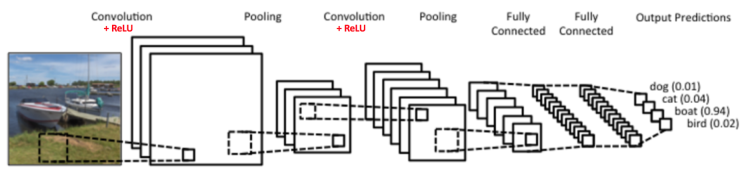

In [1]:
from PIL import Image
import urllib.request as url
import io

fd = url.urlopen("https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=748")
image_file = io.BytesIO(fd.read())
Image.open(image_file)

Another layer common in CNNs is the pooling layer. Pooling is used to reduce the size of the image representation, which translates to reduction in the number of parameters and, ultimately, the computational effort. The most common CNN architectures typically start with a convolutional layer, followed by an activation layer, then a pooling layer, and end with a traditional fully connected network such as a Multi-Layer NN.

In [2]:
# Load the libraries.

%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt  
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
import pymc3 as pm
import theano
from mpl_toolkits.mplot3d import Axes3D
#import fix_yahoo_finance as yf
warnings.simplefilter('ignore')
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

## Case: Hand-written digit recognition

Let's revisit the case of digit classification from previous lab but use CNN for the task

Import the LeCun et al. MNIST dataset of handwritten characters

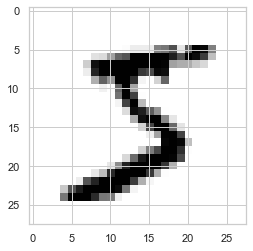

Training label(s): [5]


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_digits = 1
for i in range(num_digits):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
#    plt.axis('off')
plt.show()
print('Training label(s): %s' % (y_train[0:num_digits],))

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

### Format of basic CNN in MNIST digit recognition task
- The first hidden layer is a convolutional layer called a Convolution2D. 
- The layer has 32 feature maps, each of which are 5 X 5, and a rectifier activation function. 
- This is the input layer, expecting images with the structure of [pixels] X [width] X [height].
- A pooling layer is then defined to take the maximum called "MaxPooling2D". 
- The next layer is a regularization using dropout called "Dropout" which eliminates 25% of neurons per layer.
- Next is a layer that converts the 2D matrix data to a vector using "Flatten", which allows the output to be processed by standard fully connected layers.
- The final connection layer contains 128 neurons and rectifier activation function.
- Everything is finally reduced using perceptron layer.  

In [6]:
# Preprocess the NMIST data, but maintain datastructure for CNN.

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_pp = (X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')) / 255
X_test_pp = (X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')) / 255


# Keras needs the labels as categorical metrics.
y_train_pp = np_utils.to_categorical(y_train)
y_test_pp = np_utils.to_categorical(y_test)
num_classes = y_test_pp.shape[1]

In [7]:
## model

np.random.seed(1066)
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile, fit, and generate scores and predicted probabilities.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pp, y_train_pp, validation_data=(X_test_pp, y_test_pp), epochs=5, batch_size=200, verbose=2)
scores = model.evaluate(X_test_pp, y_test_pp, verbose=0)
prob = model.predict(X_test_pp)

Epoch 1/5
300/300 - 16s - loss: 0.2367 - accuracy: 0.9309 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 2/5
300/300 - 13s - loss: 0.0714 - accuracy: 0.9789 - val_loss: 0.0472 - val_accuracy: 0.9850
Epoch 3/5
300/300 - 12s - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.0437 - val_accuracy: 0.9859
Epoch 4/5
300/300 - 13s - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0355 - val_accuracy: 0.9880
Epoch 5/5
300/300 - 12s - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0420 - val_accuracy: 0.9854


So with CNN we can now reach around 99% out-of-sample accuracy compared to 98% acheivable with a simple (often called "vanilla" NN) from the example in the previous lab

Let's check a case which was misclassified in previous lab with vanilla NN and see the CNN's prediction for it

Classified as a 9 with probability 0.982674


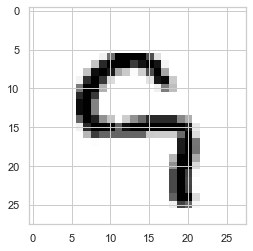

In [8]:
plt.imshow(X_test[104], cmap=plt.get_cmap('gray_r'))
print('Classified as a %d with probability %f' % (prob[104].argmax(), max(prob[104])))

In [9]:
print('Accuracy Rate: %f' % accuracy_score(y_test, prob.argmax(axis = 1)))
print('')
print('Confusion matrix:\n%s' % confusion_matrix(y_test, prob.argmax(axis = 1)))
print('')
print('Classification Report:')
print(classification_report(y_test, prob.argmax(axis = 1)))
print('')
(y_test - prob.argmax(axis = 1) > 0).nonzero()

Accuracy Rate: 0.985400

Confusion matrix:
[[ 972    0    2    0    0    0    2    1    3    0]
 [   0 1126    4    0    0    0    2    0    3    0]
 [   2    1 1023    0    0    0    0    2    4    0]
 [   0    0    0  999    0    5    0    0    6    0]
 [   0    0    2    0  974    0    2    0    3    1]
 [   2    0    0    7    0  879    1    0    3    0]
 [   7    2    1    0    1    1  942    0    4    0]
 [   0    2   11    3    1    1    0 1007    3    0]
 [   4    0    1    0    0    0    0    1  968    0]
 [   2    2    0    4    9    6    0    8   14  964]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99

(array([  62,  211,  247,  259,  320,  340,  359,  445,  448,  582,  684,
         726,  813,  882,  965, 1014, 1039, 1226, 1232, 1247, 1260, 1319,
        1326, 1393, 1414, 1530, 1553, 1554, 1709, 1717, 1754, 1901, 2035,
        2098, 2118, 2129, 2135, 2293, 2369, 2387, 2406, 2414, 2462, 2597,
        2654, 2720, 2742, 2760, 2896, 2939, 2979, 3005, 3030, 3060, 3422,
        3503, 3520, 3558, 3597, 3751, 3767, 3850, 3926, 3985, 4007, 4078,
        4224, 4238, 4248, 4575, 4761, 4807, 4814, 4823, 4966, 5246, 5937,
        6071, 6091, 6157, 6166, 6173, 6560, 6571, 6576, 9009, 9015, 9019,
        9024, 9530, 9587, 9638, 9679, 9692, 9770]),)

#### Let's use CNN for the facial recognition task we used in the PCA lab

In [10]:
# load the data

from sklearn.datasets import fetch_lfw_people 
from keras.datasets import mnist

lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4) 
  
# the images arrays to find the shapes (for plotting) 
n_samples, h, w = lfw_people.images.shape 
  
# Instead of providing 2D data, X has data already in the form  of a vector that 
# is required in this approach. 
X = lfw_people.data 
n_features = X.shape[1] 

y = lfw_people.target 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0] 

In [11]:
X.shape

(1288, 1850)

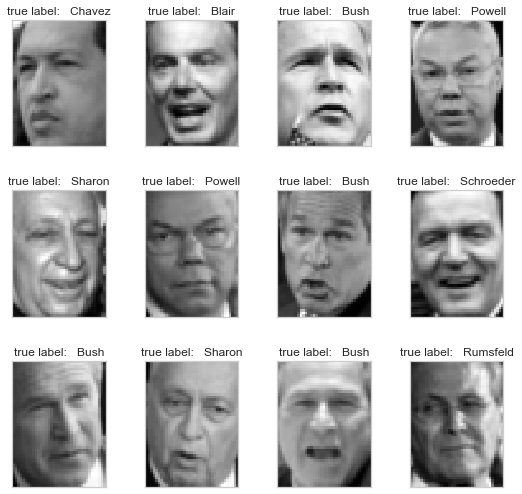

In [12]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4): 
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row)) 
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35) 
    for i in range(n_row * n_col): 
        plt.subplot(n_row, n_col, i + 1) 
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) 
        plt.title(titles[i], size = 12) 
        plt.xticks(()) 
        plt.yticks(()) 
  
# Generate true labels above the images 
def true_title(Y, target_names, i): 
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1] 
    return 'true label:   % s' % (true_name) 
  
true_titles = [true_title(y, target_names, i) 
                     for i in range(y.shape[0])] 
plot_gallery(X, true_titles, h, w) 

the data is 1288 total (50$\times$37 pixels) grayscale images belonging to 7 different faces.

In [13]:
n_classes

7

In [14]:
# lets split and reform the dataset in the format compatible for CNN
# basically we are restructuring the data into grid shapes which are apt for convolutions and further steps

X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2)

X_train_pp = (X_train.reshape(X_train.shape[0], 50, 37, 1).astype('float32')) / 255 # normalize
X_test_pp = (X_test.reshape(X_test.shape[0], 50, 37, 1).astype('float32')) / 255

y_train_pp = np_utils.to_categorical(y_train)
y_test_pp = np_utils.to_categorical(y_test)

num_classes = y_train_pp.shape[1]

In [15]:
print(X_train_pp.shape, X_test_pp.shape)

(1030, 50, 37, 1) (258, 50, 37, 1)


#### Model structure:

- add conv layer (Conv2D) with 32 features maps of (5$\times$5) dimension and input shape as the shape of images
- add a pooling layer "MaxPooling2D".
- add second conv layer to potentiall improve model performance
- Dropout to remove 25% neurons
- flatten and activation function to get output probabilities with softmax in the end

In [16]:
# model

np.random.seed(2002)
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(50, 37, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), input_shape=(50, 37, 1), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile, fit, and generate scores and predicted probabilities.
# should take under 2-3 minutes to train

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pp, y_train_pp, validation_data=(X_test_pp, y_test_pp), epochs=50, batch_size=200, verbose=2)
scores = model.evaluate(X_test_pp, y_test_pp, verbose=0)
prob = model.predict(X_test_pp)

Epoch 1/50
6/6 - 1s - loss: 1.8650 - accuracy: 0.2049 - val_loss: 1.7402 - val_accuracy: 0.4496
Epoch 2/50
6/6 - 1s - loss: 1.6967 - accuracy: 0.4019 - val_loss: 1.6259 - val_accuracy: 0.4496
Epoch 3/50
6/6 - 1s - loss: 1.6618 - accuracy: 0.4019 - val_loss: 1.5942 - val_accuracy: 0.4496
Epoch 4/50
6/6 - 1s - loss: 1.6029 - accuracy: 0.4049 - val_loss: 1.6013 - val_accuracy: 0.4922
Epoch 5/50
6/6 - 1s - loss: 1.5466 - accuracy: 0.4505 - val_loss: 1.4579 - val_accuracy: 0.5078
Epoch 6/50
6/6 - 1s - loss: 1.4188 - accuracy: 0.4990 - val_loss: 1.4191 - val_accuracy: 0.5116
Epoch 7/50
6/6 - 1s - loss: 1.3557 - accuracy: 0.5223 - val_loss: 1.2847 - val_accuracy: 0.5349
Epoch 8/50
6/6 - 1s - loss: 1.2284 - accuracy: 0.5699 - val_loss: 1.2837 - val_accuracy: 0.5620
Epoch 9/50
6/6 - 1s - loss: 1.1306 - accuracy: 0.6204 - val_loss: 1.0776 - val_accuracy: 0.6008
Epoch 10/50
6/6 - 1s - loss: 0.9923 - accuracy: 0.6592 - val_loss: 1.0594 - val_accuracy: 0.6473
Epoch 11/50
6/6 - 1s - loss: 0.9523 - a

In [17]:
# check accuracy score of predictions

from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict_classes(X_test_pp))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8914728682170543

Better accuracy than kernel PCA, which got us accuracy around 79%

In [18]:
# let's change the dropout % to 0.4 and check the out of sample accuracy

np.random.seed(2002)
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(50, 37, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), input_shape=(50, 37, 1), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile, fit, and generate scores and predicted probabilities.
# should take under 2-3 minutes to train

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pp, y_train_pp, validation_data=(X_test_pp, y_test_pp), epochs=50, batch_size=200, verbose=2)
scores = model.evaluate(X_test_pp, y_test_pp, verbose=0)
prob = model.predict(X_test_pp)

Epoch 1/50
6/6 - 1s - loss: 1.9861 - accuracy: 0.2320 - val_loss: 1.8642 - val_accuracy: 0.1705
Epoch 2/50
6/6 - 1s - loss: 1.7984 - accuracy: 0.3495 - val_loss: 1.6615 - val_accuracy: 0.4496
Epoch 3/50
6/6 - 1s - loss: 1.7195 - accuracy: 0.4019 - val_loss: 1.6544 - val_accuracy: 0.4496
Epoch 4/50
6/6 - 1s - loss: 1.6867 - accuracy: 0.4019 - val_loss: 1.6501 - val_accuracy: 0.4496
Epoch 5/50
6/6 - 1s - loss: 1.6845 - accuracy: 0.4019 - val_loss: 1.6385 - val_accuracy: 0.4496
Epoch 6/50
6/6 - 1s - loss: 1.6709 - accuracy: 0.4019 - val_loss: 1.6439 - val_accuracy: 0.4496
Epoch 7/50
6/6 - 1s - loss: 1.6679 - accuracy: 0.4019 - val_loss: 1.6295 - val_accuracy: 0.4496
Epoch 8/50
6/6 - 1s - loss: 1.6547 - accuracy: 0.4019 - val_loss: 1.6290 - val_accuracy: 0.4496
Epoch 9/50
6/6 - 1s - loss: 1.6474 - accuracy: 0.4019 - val_loss: 1.6211 - val_accuracy: 0.4496
Epoch 10/50
6/6 - 1s - loss: 1.6378 - accuracy: 0.4019 - val_loss: 1.5979 - val_accuracy: 0.4496
Epoch 11/50
6/6 - 1s - loss: 1.6239 - a

In [19]:
accuracy_score(y_test, model.predict_classes(X_test_pp))

0.8255813953488372

Accuracy reduced significantly!

## Recurrent Neural Networks (RNN)

RNNs are type of Neural Networks that have their own internal memory. They work on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.
They are widely used for speech recognition, voice recognition, time series prediction, and natural language processing. Because of their internal memory, RNNs can remember important things about the input they received, which allows them to be very precise in predicting what’s coming next. As a result, they can form a much deeper understanding of a sequence and its context compared to other algorithms.

<img src="labs_images/RNN.png" width="400">


In a RNN the information cycles through a loop. When it makes a decision, it considers the current input and also what it has learned from the inputs it received previously. RNNs apply weights to the current and also to the previous input. Furthermore, a recurrent neural network will also tweak the weights for both through gradient descent and backpropagation through time.


<img src="labs_images/RNN3.png" width="600">

from the above figure, where the formula for the current state $h_t = f(h_{t-1}, x_t)$, where $O_t$ is output state, $h_t$ current time stamp, $h_{t-1}$ is previous time stamp, and $x_t$ is passed as input state.


#### Issues with RNN training


The are two common problems with gradients (partial derivatives w.r.t inputs) during training with RNNs

- Exploding gradients: 
This happens when the algorithm assigns a unreasonably high importance to the weights. This can be solved by either truncating the backpropogation (start backprop with another timestamp instead of first), or by clipping the gradients to a threshold.

- Vanishing gradients:
This occurs when the values of a gradient are too small and the model stops learning or takes way too long as a result. It can be solved through the concept of LSTM networks.

Some resources for detailed RNN mathematics:

https://purnasaigudikandula.medium.com/recurrent-neural-networks-and-lstm-explained-7f51c7f6bbb9


### Long Short-Term Memory (LSTM)

Long short-term memory networks are an extension for recurrent neural networks, which basically extends the memory. Therefore it is well suited to learn from important experiences that have very long time lags in between. LSTMs have wide applications in time series forecasting, language modeling etc.
LSTMs have a three-step process in computations for each cell which can be achieved through 3 gates which are named as: Forget gate, Input gate, Output gate.

<img src="labs_images/LSTM1.png" width="500">

- Forget gate: This gate decides which information to be omitted in from the cell in that particular time stamp. It is decided by the sigmoid function. it looks at the previous state (ht-1) and the content input (Xt) and outputs a number between 0 and 1.
- Input gate: This gate analyzes the important information in the current input and has two functions: sigmoid decides which values to let through (0,1), and tanh gives weightage to the values which are passed deciding their level of importance ranging from -1 to 1.
- Output gate: This step decides what the output will be. It first runs a sigmoid layer, which decides what parts of the cell state make it to the output. Then, it puts the cell state through tanh to push the values to be between -1 and 1 and multiply it by the output of the forget gate.

https://builtin.com/data-science/recurrent-neural-networks-and-lstm


### Let's use LSTM to build a simple next-word predictor model

This example is analogous to a keyboard word preditor commonly used in phones and emails. It predicts the next character, or next word or even it can autocomplete the entire sentence.

Data:
Here we'll use The Adventures of Sherlock Holmes as the dataset. It is a collection of 12 short stories. This means that our word predictor will learn the model based on words from the sentences from the book. 

In [20]:
# we'll need nltk for data processing
# !pip install nltk

import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
import heapq

In [21]:
# Loading the dataset

path = 'sherlock.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 581889


Now, let's split the entire dataset into each word in order without the presence of special characters.

In [22]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [23]:
# unique sorted words list
unique_words = np.unique(words)

# dictionary(<key: value>) with each word form the unique_words list as key and its corresponding position as value.
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

Let's assume that we only need previous words to determine the next word in a sentence. So the model would learn from 5 previous inputs and adjust the weights accordingly for each.

we create an empty list called prev_words to store a set of five previous words and its corresponding next word in the next_words list. We fill these lists by looping over a range of 5 less than the length of words.

In [26]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print('sequence:', prev_words[10101])
print('next word in sequence:', next_words[10101])

sequence: ['of', 'twenty', 'one', 'years', 'are']
next word in sequence: eligible


Next, for generating feature vector we use one-hot encoding. It creates a dictionary of possible words and represents each encountered word with a binary vector, where each position represents a match with each possible word from the dictionary, so that the component corresponding to encountered word is 1 and all others are 0)

Here, we create two numpy boolean arrays X (for storing the model features, i.e the previous words) and Y (for storing the corresponding label (here, next word)). Throughout X and Y whenever the word is present then the corresponding position is made 1, others remain 0 (False).

In [27]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [45]:
# let check the encoding for above sequence 

point10101 = pd.DataFrame(data=X[10101], columns=unique_word_index.keys())

# check just for the words in sequence
point10101[['of', 'twenty', 'one', 'years', 'are']]

,of,twenty,one,years,are
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,False,False,True


Notice that X is a collection of 5$\times$8201 matrices (5 being the number of previous words we are considering in the model, and 8201 is the number of unique words in the data) where we assign 1 in the index of a word being considered. So in the case of sequence ['of', 'twenty', 'one', 'years', 'are'], the indices of these words would be set to one as input and the same for the output y, which would be a 1$\times$8201 array

In [47]:
X[0].shape

(5, 8201)

Model: We use a single-layer LSTM model with 128 neurons, a fully connected layer, and a softmax function for activation.

There is a lot of commentary on deciding the number of layers and the number of neurons for a LSTM layer. One rule on the number of neurons is take it to be the mean of size of the input and size of the output layers. But depending on the problem, the input feature matrix could be quite sparse (which could happen in word-based models). Hence adding a huge number of neurons can over-complicate the model while not contributing much to the results. 

Similarly, for the number of layers, more hidden layers would be able to learn sophisticated structures in the data while increasing the complexity of the model. We'll consider just a single layer for simplicity.
Softmax function is added as activation at each temporal step.

In [57]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [58]:
# training - just 2 epochs - should take around 5-7 mins for 2 epochs

np.random.seed(2002)
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2
811/811 [==============================] - 214s 264ms/step - loss: 6.0149 - accuracy: 0.1071 - val_loss: 7.0490 - val_accuracy: 0.1031
Epoch 2/2
811/811 [==============================] - 142s 175ms/step - loss: 5.7800 - accuracy: 0.1480 - val_loss: 7.7951 - val_accuracy: 0.1036


We get around 10% out of sample accuracy. This could because of few reasons. First, the model architecture is quite simple - we just have a single layer plus we have trained it for 2 epochs. We can improve the performace by adding the complexity of model by adding more layers, dropout to prevent overfitting and training for more epochs. (can add significant training time).
Also, we can tweak the feature set by considering more previous words in the training. Moreover, the dataset contains around 1.2k unique words out of a possible 23k unique words in English dictionary. To train with such a large set, we would need to perform Batch Processing (https://stats.stackexchange.com/questions/393421/batch-processing-in-a-neural-network)

Now, we need to predict new words using this model. To do that we input the sample as a feature vector. we convert the input string to a single feature vector.

In [59]:
# function for preparing input as vecotrs

def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x

# function for n choose best possible words after prediction
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

# for prediction
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [60]:
# let's check output for a case

q =  "Your life will never be the same again"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  Your life will never be the same again
Sequence:  your life will never be
your
life
will
never
be
next possible words:  ['the', 'a', 'in', 'so', 'to']


In [87]:
# probabilities for predicted words

prob = model.predict(prepare_input(seq), verbose=0)[0] # calculate probabilities
[prob[key] for key in np.argsort(prob)[-5:][::-1]]  # print for predicted words

your
life
will
never
be


[0.058045458, 0.043305438, 0.040066812, 0.028261509, 0.02809475]